# This is from colab

### check pandas version

In [1]:
from __future__ import print_function
import pandas as pd
pd.__version__

'0.23.4'

 *pandas* 中的主要数据结构被实现为以下两类：

  * **`DataFrame`**，您可以将它想象成一个关系型数据表格，其中包含多个行和已命名的列。
  * **`Series`**，它是单一列。`DataFrame` 中包含一个或多个 `Series`，每个 `Series` 均有一个名称。

数据框架是用于数据操控的一种常用抽象实现形式。[Spark](https://spark.apache.org/) 和 [R](https://www.r-project.org/about.html) 中也有类似的实现。

创建 `Series` 的一种方法是构建 `Series` 对象。例如：

In [2]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

 您可以将映射 `string` 列名称的 `dict` 传递到它们各自的 `Series`，从而创建`DataFrame`对象。如果 `Series` 在长度上不一致，系统会用特殊的 [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 值填充缺失的值。例如：

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


但是在大多数情况下，您需要将整个文件加载到 `DataFrame` 中。下面的示例加载了一个包含加利福尼亚州住房数据的文件。请运行以下单元格以加载数据，并创建特征定义：

In [11]:
#california_housing_dataframe = pd.read_csv("https://download.mlcc.google.cn/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = pd.DataFrame({ 'City name': city_names, 'Population': population })
california_housing_dataframe.describe()

,Population
count,3.000000e+00
mean,7.844843e+05
std,2.717477e+05
min,4.851990e+05
25%,6.688340e+05
50%,8.524690e+05
75%,9.341270e+05
max,1.015785e+06


 上面的示例使用 `DataFrame.describe` 来显示关于 `DataFrame` 的有趣统计信息。另一个实用函数是 `DataFrame.head`，它显示 `DataFrame` 的前几个记录：

1.   列表项
2.   列表项



In [12]:
california_housing_dataframe.head()

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


 *pandas* 的另一个强大功能是绘制图表。例如，借助 `DataFrame.hist`，您可以快速了解一个列中值的分布：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc56b704748>]],
      dtype=object)

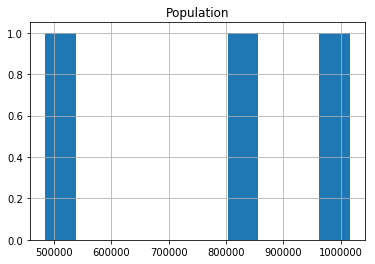

In [28]:
#california_housing_dataframe.hist('housing_median_age')
california_housing_dataframe.hist('Population')

 ## 访问数据

您可以使用熟悉的 Python dict/list 指令访问 `DataFrame` 数据：

In [29]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [30]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [31]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


 此外，*pandas* 针对高级[索引和选择](http://pandas.pydata.org/pandas-docs/stable/indexing.html)提供了极其丰富的 API（数量过多，此处无法逐一列出）。

 ## 操控数据

您可以向 `Series` 应用 Python 的基本运算指令。例如：

In [32]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [33]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 对于更复杂的单列转换，您可以使用 `Series.apply`。像 Python [映射函数](https://docs.python.org/2/library/functions.html#map)一样，`Series.apply` 将以参数形式接受 [lambda 函数](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)，而该函数会应用于每个值。

下面的示例创建了一个指明 `population` 是否超过 100 万的新 `Series`：

In [34]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

`DataFrames` 的修改方式也非常简单。例如，以下代码向现有 `DataFrame` 添加了两个 `Series`：

In [80]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density,Bool
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 ## 练习 1

通过添加一个新的布尔值列（当且仅当以下*两项*均为 True 时为 True）修改 `cities` 表格：

  * 城市以圣人命名。
  * 城市面积大于 50 平方英里。

**注意：**布尔值 `Series` 是使用“按位”而非传统布尔值“运算符”组合的。例如，执行*逻辑与*时，应使用 `&`，而不是 `and`。

**提示：**"San" 在西班牙语中意为 "saint"。

In [81]:
cities['Bool'] =\
cities['City name'].apply(lambda name: name.startswith('San')) &\
(cities['Area square miles']>50)

cities['Bool']

0    False
1     True
2    False
Name: Bool, dtype: bool

In [83]:
# Wrong example (my code)
print([name[0:3]=='San' for name in cities['City name']])
print([area>50 for area in cities['Area square miles']])
print([(name[0:3]=='San') & (area>50) for name in cities['City name'] for area in cities['Area square miles']])

[True, True, False]
[False, True, True]
[False, True, True, False, True, True, False, False, False]


0    San Francisco
Name: City name, dtype: object

 ## 索引
`Series` 和 `DataFrame` 对象也定义了 `index` 属性，该属性会向每个 `Series` 项或 `DataFrame` 行赋一个标识符值。

默认情况下，在构造时，*pandas* 会赋可反映源数据顺序的索引值。索引值在创建后是稳定的；也就是说，它们不会因为数据重新排序而发生改变。

In [84]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [85]:
cities.index

RangeIndex(start=0, stop=3, step=1)

 调用 `DataFrame.reindex` 以手动重新排列各行的顺序。例如，以下方式与按城市名称排序具有相同的效果：

In [86]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Bool
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


 重建索引是一种随机排列 `DataFrame` 的绝佳方式。在下面的示例中，我们会取用类似数组的索引，然后将其传递至 NumPy 的 `random.permutation` 函数，该函数会随机排列其值的位置。如果使用此重新随机排列的数组调用 `reindex`，会导致 `DataFrame` 行以同样的方式随机排列。
尝试多次运行以下单元格！

In [88]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Bool
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False


 ## 练习 2
`reindex` 方法允许使用未包含在原始 `DataFrame` 索引值中的索引值。请试一下，看看如果使用此类值会发生什么！您认为允许此类值的原因是什么？

In [90]:
# my code
cities.reindex([6,0,1])

,City name,Population,Area square miles,Population density,Bool
6,NaN,NaN,NaN,NaN,NaN
0,San Francisco,852469.0,46.87,18187.945381,False
1,San Jose,1015785.0,176.53,5754.177760,True


In [91]:
cities

,City name,Population,Area square miles,Population density,Bool
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 如果您的 `reindex` 输入数组包含原始 `DataFrame` 索引值中没有的值，`reindex` 会为此类“丢失的”索引添加新行，并在所有对应列中填充 `NaN` 值：

In [92]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Bool
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


这种行为是可取的，因为索引通常是从实际数据中提取的字符串（请参阅 [*pandas* reindex 文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)，查看索引值是浏览器名称的示例）。

在这种情况下，如果允许出现“丢失的”索引，您将可以轻松使用外部列表重建索引，因为您不必担心会将输入清理掉。